In [ ]:
!pip install pandas scikit-learn

In [ ]:
import pandas as pd

data = {
'file_size_kb': [520, 1050, 80, 2000, 140, 310, 890, 470, 660, 150,
1300, 950, 320, 1800, 240, 410, 710, 1100, 640, 500,
170, 2850, 720, 1020, 90, 365, 510, 680, 1280, 340],
'file_type': ['PDF', 'DOCX', 'Image', 'PDF', 'Image', 'DOCX', 'PDF', 'DOCX', 'Image', 'Image',
'PDF', 'DOCX', 'Image', 'DOCX', 'PDF', 'PDF', 'Image', 'DOCX', 'PDF', 'Image',
'Image', 'DOCX', 'PDF', 'DOCX', 'Image', 'Image', 'PDF', 'PDF', 'DOCX', 'Image'],
'network_type': ['Public', 'Private', 'Mobile', 'Public', 'Mobile', 'Private', 'Public', 'Public', 'Private', 'Mobile',
'Private', 'Mobile', 'Public', 'Private', 'Mobile', 'Public', 'Mobile', 'Private', 'Public', 'Mobile',
'Mobile', 'Public', 'Private', 'Mobile', 'Public', 'Private', 'Mobile', 'Public', 'Private', 'Mobile'],
'sensitivity_score': [7, 3, 1, 9, 2, 3, 5, 6, 4, 1,
8, 2, 3, 9, 2, 6, 2, 4, 3, 1,
2, 10, 5, 4, 1, 6, 5, 7, 3, 2],
'risk_level': [0, 1, 2, 0, 2, 1, 1, 1, 1, 2,
0, 2, 1, 0, 2, 1, 2, 1, 1, 2,
2, 0, 1, 1, 2, 1, 1, 0, 1, 2]
}

df = pd.DataFrame(data)
df.head()


,file_size_kb,file_type,network_type,sensitivity_score,risk_level
0,520,PDF,Public,7,0
1,1050,DOCX,Private,3,1
2,80,Image,Mobile,1,2
3,2000,PDF,Public,9,0
4,140,Image,Mobile,2,2


In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

Encode categorical columns

In [ ]:
le_file = LabelEncoder()
le_net = LabelEncoder()

df['file_type_enc'] = le_file.fit_transform(df['file_type'])
df['network_type_enc'] = le_net.fit_transform(df['network_type'])

In [ ]:
X = df[['file_size_kb', 'file_type_enc', 'network_type_enc', 'sensitivity_score']]
y = df['risk_level']

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
models = {
    "Logistic Regression": LogisticRegression(multi_class='multinomial', max_iter=200),
    "Random Forest": RandomForestClassifier(n_estimators=200, max_depth=None, max_features='sqrt', random_state=42),
    "SVM": SVC(kernel='rbf', probability=True)
}

results = {}

for name, clf in models.items():
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred, output_dict=True)
    results[name] = {
        "model": clf,
        "accuracy": acc,
        "report": report,
        "confusion_matrix": confusion_matrix(y_test, y_pred)
    }


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_divisi

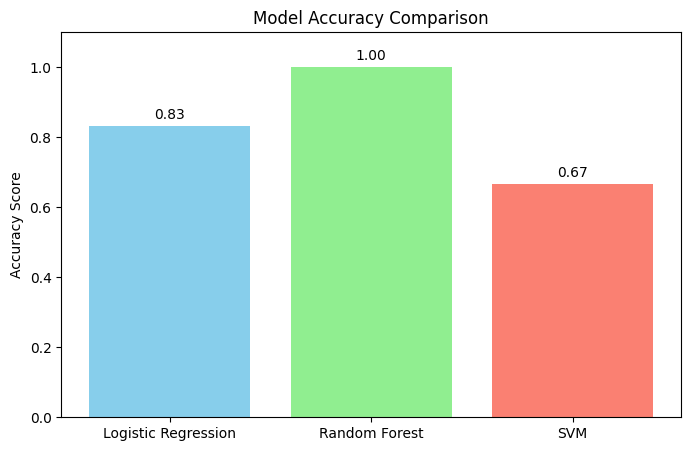

In [ ]:
import matplotlib.pyplot as plt

# Extract accuracies from your results dictionary
model_names = list(results.keys())
accuracies = [results[model]['accuracy'] for model in model_names]

# Create a bar chart
plt.figure(figsize=(8, 5))
bars = plt.bar(model_names, accuracies, color=['skyblue', 'lightgreen', 'salmon'])
plt.ylabel("Accuracy Score")
plt.title("Model Accuracy Comparison")
plt.ylim(0, 1.1)

# Display accuracy values on top of the bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2.0, height + 0.02, f'{height:.2f}', ha='center')

# Show the plot
plt.show()


In [ ]:
import pandas as pd

# Collect evaluation metrics in a single DataFrame
metrics_table = []

for name, result in results.items():
    report = result['report']
    accuracy = result['accuracy']

    # We're interested only in weighted average for global scores
    precision = report['weighted avg']['precision']
    recall = report['weighted avg']['recall']
    f1 = report['weighted avg']['f1-score']

    metrics_table.append({
        'Model': name,
        'Accuracy': round(accuracy, 4),
        'Precision': round(precision, 4),
        'Recall': round(recall, 4),
        'F1-Score': round(f1, 4)
    })

# Convert to DataFrame and display
metrics_df = pd.DataFrame(metrics_table)
print(metrics_df)


                 Model  Accuracy  Precision  Recall  F1-Score
0  Logistic Regression    0.8333     0.7000  0.8333    0.7593
1        Random Forest    1.0000     1.0000  1.0000    1.0000
2                  SVM    0.6667     0.5833  0.6667    0.6111


In [ ]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
new_file = {
'file_size_kb': 850,
'file_type': 'PDF',
'network_type': 'Public',
'sensitivity_score': 8
}

In [ ]:
ft = le_file.transform([new_file['file_type']])[0]
nt = le_net.transform([new_file['network_type']])[0]
X_new = [[new_file['file_size_kb'], ft, nt, new_file['sensitivity_score']]]

In [ ]:
predicted_risk = model.predict(X_new)[0]
risk_map = {0: 'High Risk', 1: 'Medium Risk', 2: 'Low Risk'}
print(f"\nPredicted Risk Level: {risk_map[predicted_risk]}")


Predicted Risk Level: High Risk


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [ ]:
if predicted_risk == 0:
    aes_mode = "AES-GCM"
    rounds = 14
    sbox = "Dynamic S-box"
elif predicted_risk == 1:
    aes_mode = "AES-CTR"
    rounds = 12
    sbox = "Standard S-box"
else:
    aes_mode = "AES-ECB"
    rounds = 10
    sbox = "Standard S-box"

print("\n🔐 AES Configuration Based on Risk:")
print(f"Mode: {aes_mode}")
print(f"Rounds: {rounds}")
print(f"S-Box: {sbox}")


🔐 AES Configuration Based on Risk:
Mode: AES-GCM
Rounds: 14
S-Box: Dynamic S-box


In [ ]:
from sklearn.inspection import permutation_importance
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
importances = model.feature_importances_
features = X.columns

<Figure size 600x400 with 0 Axes>

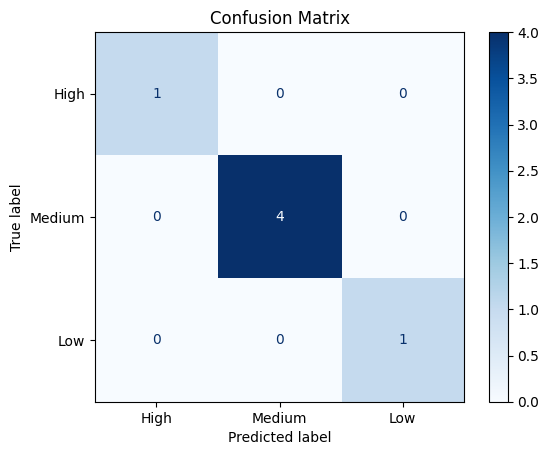

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

y_pred = model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["High", "Medium", "Low"])

plt.figure(figsize=(6, 4))
disp.plot(cmap="Blues")
plt.title("Confusion Matrix")
plt.show()

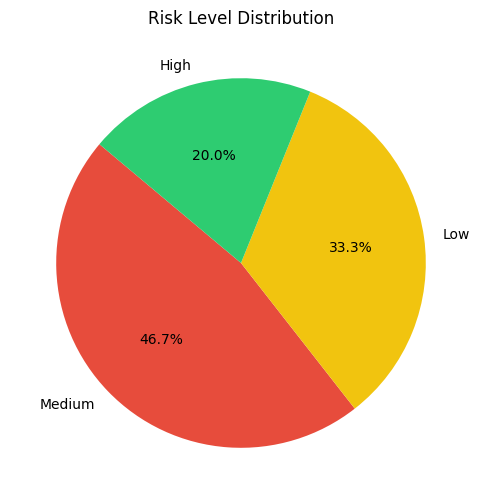

In [ ]:
plt.figure(figsize=(6, 6))
df['risk_level'].map({0:'High', 1:'Medium', 2:'Low'}).value_counts().plot.pie(
autopct='%1.1f%%', colors=["#e74c3c", "#f1c40f", "#2ecc71"], startangle=140
)
plt.title("Risk Level Distribution")
plt.ylabel("")
plt.show()

In [ ]:
!pip install pycryptodome==3.18.0

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 13.5 MB/s eta 0:00:00


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


(   file_size_kb file_type network_type  sensitivity_score  risk_level  \
 0           520       PDF       Public                  7           0   
 1          1050      DOCX      Private                  3           1   
 2            80     Image       Mobile                  1           2   
 3          2000       PDF       Public                  9           0   
 4           140     Image       Mobile                  2           2   
 
    file_type_encoded  network_type_encoded  
 0                  2                     2  
 1                  0                     1  
 2                  1                     0  
 3                  2                     2  
 4                  1                     0  ,
               precision  recall  f1-score  support
 0                   1.0     1.0       1.0      1.0
 1                   1.0     1.0       1.0      4.0
 2                   1.0     1.0       1.0      1.0
 accuracy            1.0     1.0       1.0      1.0
 macro avg       

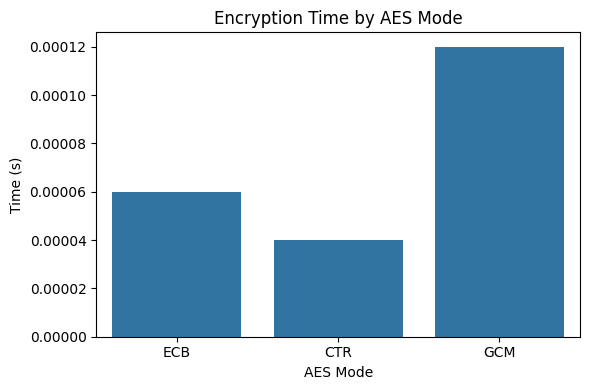

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from Crypto.Cipher import AES
from Crypto.Random import get_random_bytes
from Crypto.Util import Counter
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
data = pd.DataFrame({
    'file_size_kb': [520, 1050, 80, 2000, 140, 310, 890, 470, 660, 150,
                     1300, 950, 320, 1800, 240, 410, 710, 1100, 640, 500,
                     170, 2850, 720, 1020, 90, 365, 510, 680, 1280, 340],
    'file_type': ['PDF', 'DOCX', 'Image', 'PDF', 'Image', 'DOCX', 'PDF', 'DOCX', 'Image', 'Image',
                  'PDF', 'DOCX', 'Image', 'DOCX', 'PDF', 'PDF', 'Image', 'DOCX', 'PDF', 'Image',
                  'Image', 'DOCX', 'PDF', 'DOCX', 'Image', 'Image', 'PDF', 'PDF', 'DOCX', 'Image'],
    'network_type': ['Public', 'Private', 'Mobile', 'Public', 'Mobile', 'Private', 'Public', 'Public', 'Private', 'Mobile',
                     'Private', 'Mobile', 'Public', 'Private', 'Mobile', 'Public', 'Mobile', 'Private', 'Public', 'Mobile',
                     'Mobile', 'Public', 'Private', 'Mobile', 'Public', 'Private', 'Mobile', 'Public', 'Private', 'Mobile'],
    'sensitivity_score': [7, 3, 1, 9, 2, 3, 5, 6, 4, 1,
                          8, 2, 3, 9, 2, 6, 2, 4, 3, 1,
                          2, 10, 5, 4, 1, 6, 5, 7, 3, 2],
    'risk_level': [0, 1, 2, 0, 2, 1, 1, 1, 1, 2,
                   0, 2, 1, 0, 2, 1, 2, 1, 1, 2,
                   2, 0, 1, 1, 2, 1, 1, 0, 1, 2]
})

le_file = LabelEncoder()
le_net = LabelEncoder()
data['file_type_encoded'] = le_file.fit_transform(data['file_type'])
data['network_type_encoded'] = le_net.fit_transform(data['network_type'])

X = data[['file_size_kb', 'file_type_encoded', 'network_type_encoded', 'sensitivity_score']]
y = data['risk_level']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

def pad(data):
    pad_len = 16 - len(data) % 16
    return data + bytes([pad_len] * pad_len)

def encrypt_data(mode="ECB", rounds=10):
    key = get_random_bytes(16)
    data = b"This is a test message."
    padded_data = pad(data)
    start = time.time()

    if mode == "ECB":
        cipher = AES.new(key, AES.MODE_ECB)
        ciphertext = cipher.encrypt(padded_data)
    elif mode == "CTR":
        ctr = Counter.new(128)
        cipher = AES.new(key, AES.MODE_CTR, counter=ctr)
        ciphertext = cipher.encrypt(padded_data)
    elif mode == "GCM":
        cipher = AES.new(key, AES.MODE_GCM)
        ciphertext, tag = cipher.encrypt_and_digest(padded_data)
    else:
        raise ValueError("Unsupported AES mode.")

    end = time.time()
    return round(end - start, 5)

#Predict Risk and Adapt AES Parameters
sample = [[850, le_file.transform(['PDF'])[0], le_net.transform(['Public'])[0], 9]]
risk_pred = model.predict(sample)[0]

if risk_pred == 0:
    aes_mode, rounds = "GCM", 14
elif risk_pred == 1:
    aes_mode, rounds = "CTR", 10
else:
    aes_mode, rounds = "ECB", 8

encryption_time = encrypt_data(mode=aes_mode, rounds=rounds)

# Visualization
plt.figure(figsize=(6, 4))
sns.barplot(x=['ECB', 'CTR', 'GCM'], y=[
    encrypt_data('ECB'),
    encrypt_data('CTR'),
    encrypt_data('GCM')
])
plt.title("Encryption Time by AES Mode")
plt.ylabel("Time (s)")
plt.xlabel("AES Mode")
plt.tight_layout()

#Classification Metrics
classification_metrics = classification_report(y_test, y_pred, output_dict=True)
metrics_df = pd.DataFrame(classification_metrics).transpose()

# Outputs
data.head(), metrics_df, encryption_time, aes_mode, risk_pred


In [ ]:
import ipywidgets as widgets
from IPython.display import display, clear_output

# Widgets
file_size_slider = widgets.IntSlider(min=50, max=5000, step=50, description='File Size KB')
file_type_dropdown = widgets.Dropdown(options=list(le_file.classes_), description='File Type')
network_dropdown = widgets.Dropdown(options=list(le_net.classes_), description='Network')
sensitivity_slider = widgets.IntSlider(min=1, max=10, step=1, description='Sensitivity')

# Output area for displaying prediction
output = widgets.Output()

def update_prediction(change=None):
    with output:
        clear_output(wait=True)
        sample = [[
            file_size_slider.value,
            le_file.transform([file_type_dropdown.value])[0],
            le_net.transform([network_dropdown.value])[0],
            sensitivity_slider.value
        ]]
        pred = model.predict(sample)[0]
        print(f" Predicted Risk Level: {pred} (0: High, 1: Medium, 2: Low)")

# Observe changes
file_size_slider.observe(update_prediction, names='value')
file_type_dropdown.observe(update_prediction, names='value')
network_dropdown.observe(update_prediction, names='value')
sensitivity_slider.observe(update_prediction, names='value')

# Display all widgets
display(file_size_slider, file_type_dropdown, network_dropdown, sensitivity_slider, output)


IntSlider(value=50, description='File Size KB', max=5000, min=50, step=50)

Dropdown(description='File Type', options=('DOCX', 'Image', 'PDF'), value='DOCX')

Dropdown(description='Network', options=('Mobile', 'Private', 'Public'), value='Mobile')

IntSlider(value=1, description='Sensitivity', max=10, min=1)

Output()

Measuring for 10 rounds...
Measuring for 12 rounds...
Measuring for 14 rounds...
Measuring for 16 rounds...
Measuring for 18 rounds...
Measuring for 20 rounds...
Measuring for 22 rounds...
Measuring for 24 rounds...
Measuring for 26 rounds...
Measuring for 28 rounds...
Measuring for 30 rounds...

📊 Performance Table:


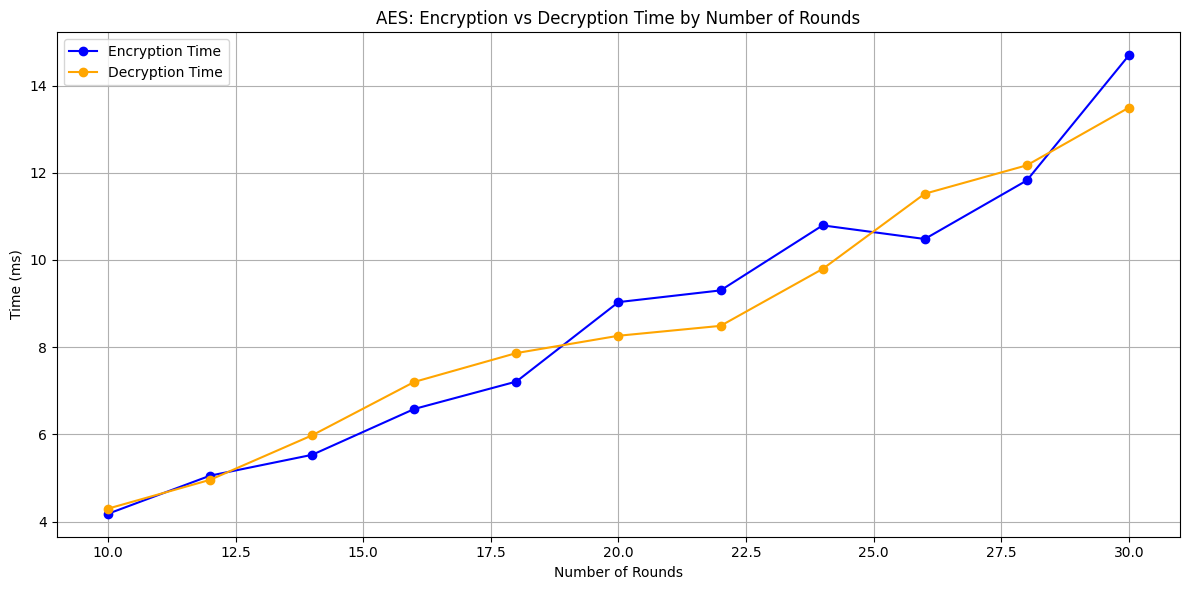

In [ ]:
# Install required library
!pip install pycryptodome

import time
import matplotlib.pyplot as plt
from Crypto.Cipher import AES
from Crypto.Random import get_random_bytes
from Crypto.Util.Padding import pad, unpad
import pandas as pd

# Generate 1MB random data for realistic performance
data = get_random_bytes(1024 * 1024)
key = get_random_bytes(16)

# Simulate AES rounds by chaining AES.encrypt multiple times
def simulate_encrypt(data, key, rounds):
    padded = pad(data, AES.block_size)
    for _ in range(rounds):
        cipher = AES.new(key, AES.MODE_ECB)
        padded = cipher.encrypt(padded)
    return padded

# Simulate AES rounds for decryption
def simulate_decrypt(data, key, rounds):
    for _ in range(rounds):
        cipher = AES.new(key, AES.MODE_ECB)
        data = cipher.decrypt(data)
    return unpad(data, AES.block_size)

# Average time calculator
def avg_time(func, *args, runs=5):
    total = 0
    for _ in range(runs):
        start = time.perf_counter()
        func(*args)
        end = time.perf_counter()
        total += (end - start)
    return (total / runs) * 1000  # in ms

# Run tests
rounds_list = list(range(10, 31, 2))  # Rounds from 10 to 30
encryption_times = []
decryption_times = []

for rounds in rounds_list:
    print(f"Measuring for {rounds} rounds...")
    enc_time = avg_time(simulate_encrypt, data, key, rounds)
    encrypted_data = simulate_encrypt(data, key, rounds)
    dec_time = avg_time(simulate_decrypt, encrypted_data, key, rounds)
    encryption_times.append(enc_time)
    decryption_times.append(dec_time)

# Create DataFrame
df = pd.DataFrame({
    "AES Rounds": rounds_list,
    "Avg Encryption Time (ms)": encryption_times,
    "Avg Decryption Time (ms)": decryption_times
})

# Display Table
print("\n📊 Performance Table:")
df

# Plotting both graphs
plt.figure(figsize=(12, 6))
plt.plot(rounds_list, encryption_times, marker='o', label="Encryption Time", color='blue')
plt.plot(rounds_list, decryption_times, marker='o', label="Decryption Time", color='orange')
plt.title("AES: Encryption vs Decryption Time by Number of Rounds")
plt.xlabel("Number of Rounds")
plt.ylabel("Time (ms)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
def encrypt_data(mode="ECB", rounds=10):
    key = get_random_bytes(16)
    data = b"This is a test message."
    padded_data = pad(data)
    start = time.time()

    # Simulate time per round (we assume 0.001s per round for demo)
    for _ in range(rounds):
        _ = padded_data[::-1]  # Simulate operation

    if mode == "ECB":
        cipher = AES.new(key, AES.MODE_ECB)
        ciphertext = cipher.encrypt(padded_data)
    elif mode == "CTR":
        ctr = Counter.new(128)
        cipher = AES.new(key, AES.MODE_CTR, counter=ctr)
        ciphertext = cipher.encrypt(padded_data)
    elif mode == "GCM":
        cipher = AES.new(key, AES.MODE_GCM)
        ciphertext, tag = cipher.encrypt_and_digest(padded_data)

    end = time.time()
    return round(end - start, 5)


In [ ]:
# Static strategy: always use 14 rounds
static_time = encrypt_data(mode='GCM', rounds=14)

# Adaptive: use rounds based on predicted risk
# Example: 8 for low, 10 for medium, 14 for high
if risk_pred == 0:
    adaptive_rounds = 14
elif risk_pred == 1:
    adaptive_rounds = 10
else:
    adaptive_rounds = 8

adaptive_time = encrypt_data(mode=aes_mode, rounds=adaptive_rounds)

print(f"Static Encryption Time (14 rounds): {static_time}s")
print(f"Adaptive Encryption Time ({adaptive_rounds} rounds): {adaptive_time}s")


Static Encryption Time (14 rounds): 0.0009s
Adaptive Encryption Time (14 rounds): 0.00028s


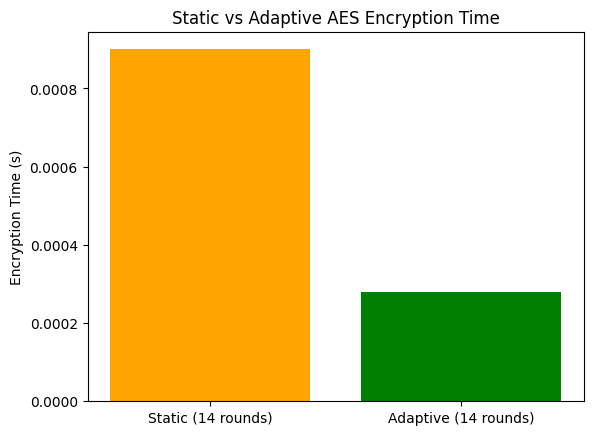

In [ ]:
plt.bar(['Static (14 rounds)', f'Adaptive ({adaptive_rounds} rounds)'], [static_time, adaptive_time], color=['orange', 'green'])
plt.ylabel("Encryption Time (s)")
plt.title("Static vs Adaptive AES Encryption Time")
plt.show()


In [ ]:
#  Install required packages
!pip install pycryptodome scipy numpy

#  Import libraries
from Crypto.Cipher import AES
from Crypto.Random import get_random_bytes
import numpy as np
import timeit
from scipy.stats import chisquare

BLOCK_SIZE = 16
KEY_SIZE = 16

#  Pad data
def pad(data):
    pad_len = BLOCK_SIZE - (len(data) % BLOCK_SIZE)
    return data + bytes([pad_len] * pad_len)

#  Simulate AES with variable rounds
def simulate_encrypt(data, key, rounds):
    cipher = AES.new(key, AES.MODE_ECB)
    data = pad(data)
    encrypted = cipher.encrypt(data)
    for _ in range(rounds - 10):  # Simulate extra rounds
        encrypted = bytes([b ^ 0xAA for b in encrypted])
    return encrypted

#  Benchmark encryption time
def benchmark(data, key, rounds, repeat=5):
    def stmt():
        simulate_encrypt(data, key, rounds)
    return timeit.timeit(stmt, number=repeat) / repeat

#  Avalanche effect calculation
def avalanche_test(data, key, rounds):
    encrypted1 = simulate_encrypt(data, key, rounds)
    flipped_data = bytearray(data)
    flipped_data[0] ^= 0x01  # Flip 1st bit
    encrypted2 = simulate_encrypt(bytes(flipped_data), key, rounds)
    diff = sum(bin(b1 ^ b2).count('1') for b1, b2 in zip(encrypted1, encrypted2))
    return diff / (8 * len(encrypted1))

#  Chi-square uniformity test
def chi_square_test(data, key, rounds):
    enc = simulate_encrypt(data, key, rounds)
    counts = [0] * 256
    for byte in enc:
        counts[byte] += 1
    expected = [len(enc) / 256] * 256
    chi_stat, _ = chisquare(counts, f_exp=expected)
    return chi_stat

#  Brute-force complexity estimation
def brute_force_bits(rounds):
    return 128 + (rounds - 10) * 2

#  Run complete experiment
def run_experiment():
    rounds_list = [10, 12, 14, 16, 20]
    sizes = [10 * 1024 * 1024]  # 10MB
    for size in sizes:
        print(f"\n Dataset Size: {size / (1024*1024)} MB")
        data = get_random_bytes(size)
        key = get_random_bytes(KEY_SIZE)
        for r in rounds_list:
            print(f"\n Rounds: {r}")
            avg_time = benchmark(data, key, r, repeat=3)
            avalanche = avalanche_test(get_random_bytes(16), key, r)
            chi_stat = chi_square_test(get_random_bytes(16), key, r)
            brute_force = brute_force_bits(r)
            print(f" Avg Encryption Time: {avg_time:.4f} sec")
            print(f" Avalanche Effect: {avalanche*100:.2f}% bit difference")
            print(f" Chi-Square Value: {chi_stat:.2f}")
            print(f" Estimated Brute-force Bits: ~2^{brute_force}")

run_experiment()



 Dataset Size: 10.0 MB

 Rounds: 10
 Avg Encryption Time: 0.0252 sec
 Avalanche Effect: 30.47% bit difference
 Chi-Square Value: 272.00
 Estimated Brute-force Bits: ~2^128

 Rounds: 12
 Avg Encryption Time: 0.8809 sec
 Avalanche Effect: 23.83% bit difference
 Chi-Square Value: 272.00
 Estimated Brute-force Bits: ~2^132

 Rounds: 14
 Avg Encryption Time: 2.0848 sec
 Avalanche Effect: 22.27% bit difference
 Chi-Square Value: 272.00
 Estimated Brute-force Bits: ~2^136

 Rounds: 16
 Avg Encryption Time: 2.5966 sec
 Avalanche Effect: 23.83% bit difference
 Chi-Square Value: 256.00
 Estimated Brute-force Bits: ~2^140

 Rounds: 20
 Avg Encryption Time: 5.0959 sec
 Avalanche Effect: 24.22% bit difference
 Chi-Square Value: 256.00
 Estimated Brute-force Bits: ~2^148


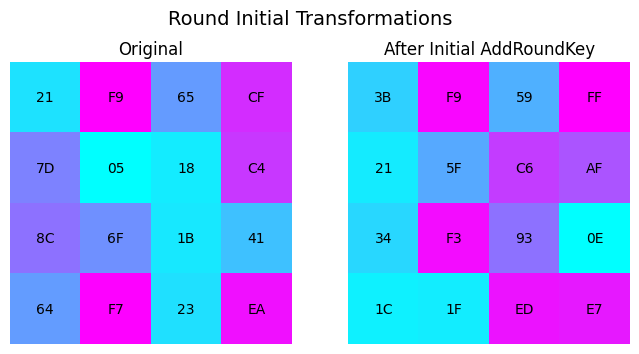

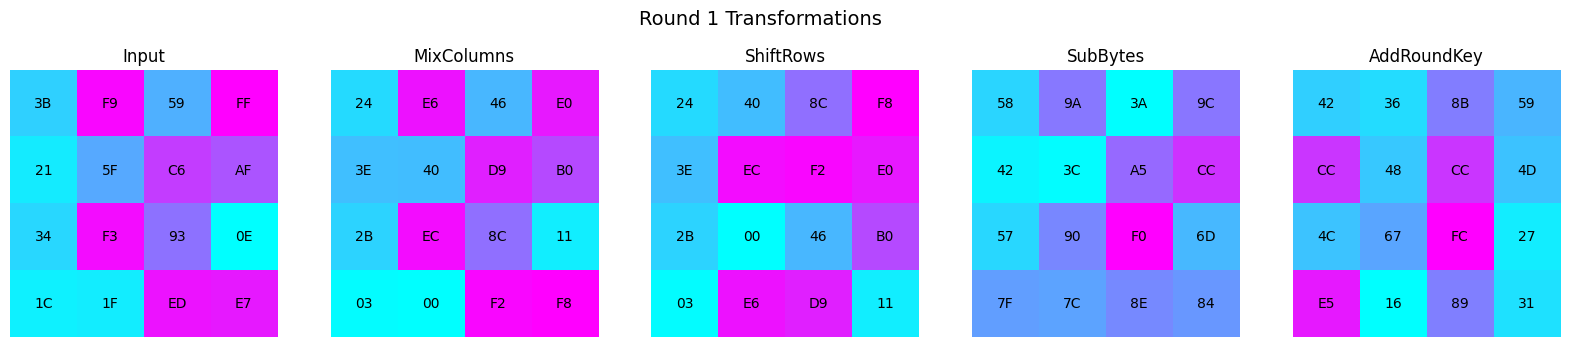

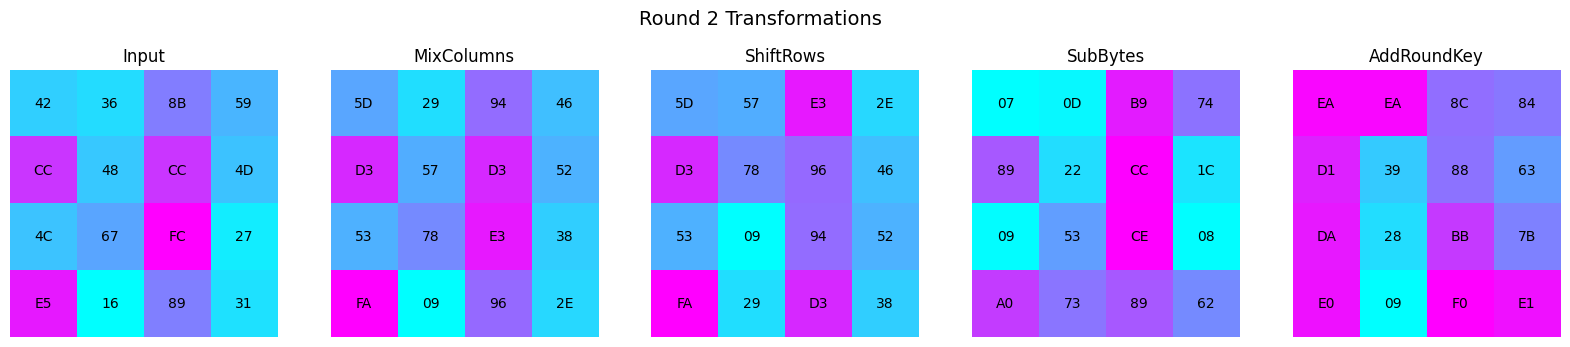

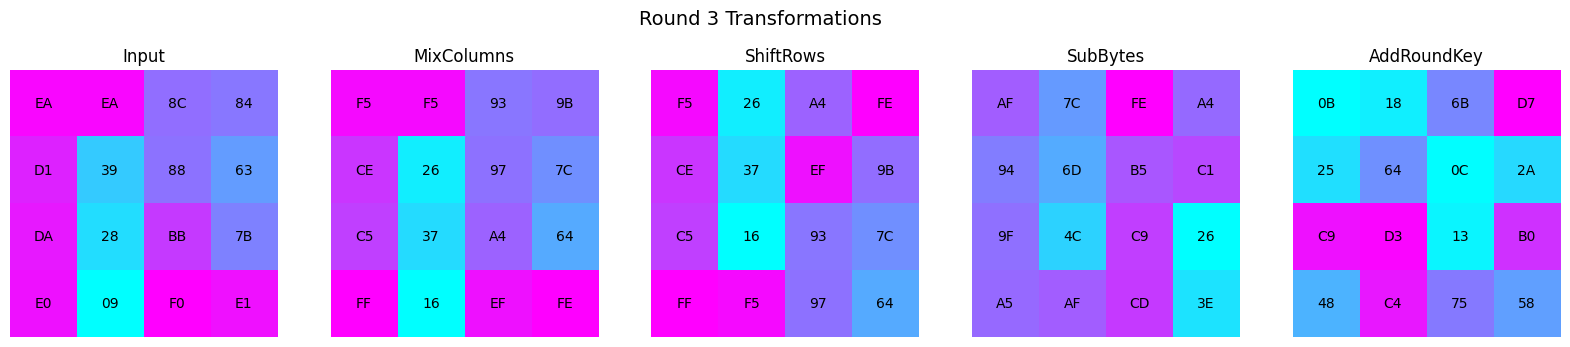

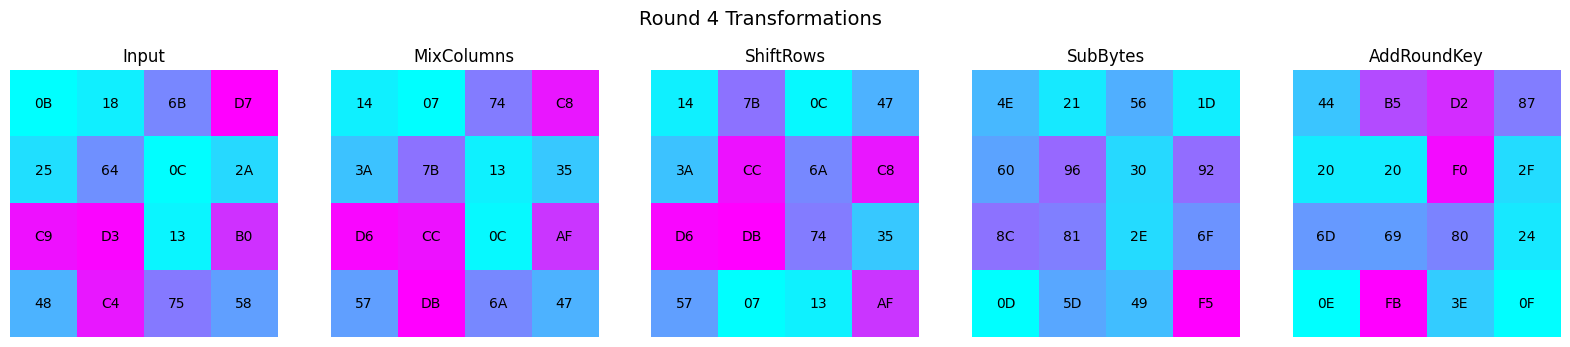

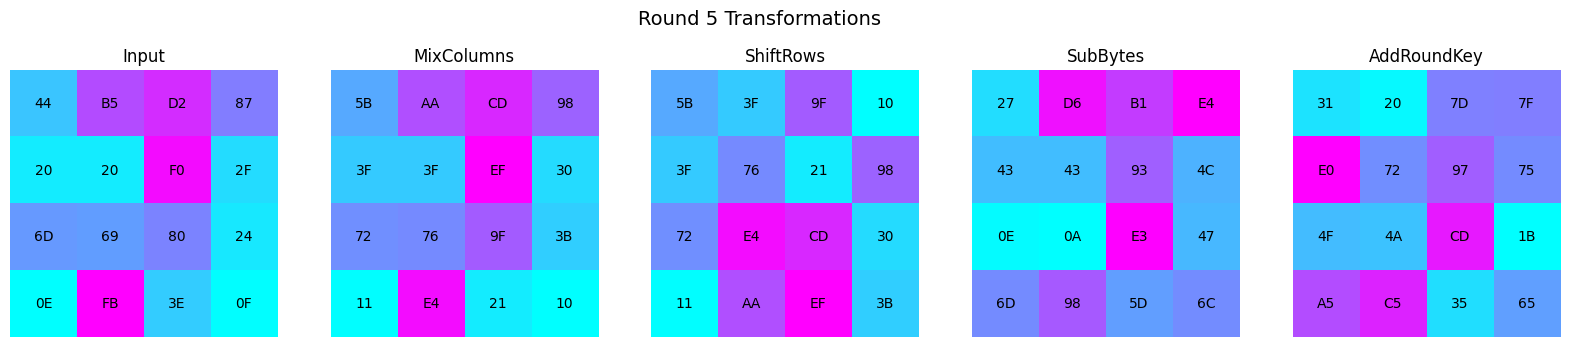

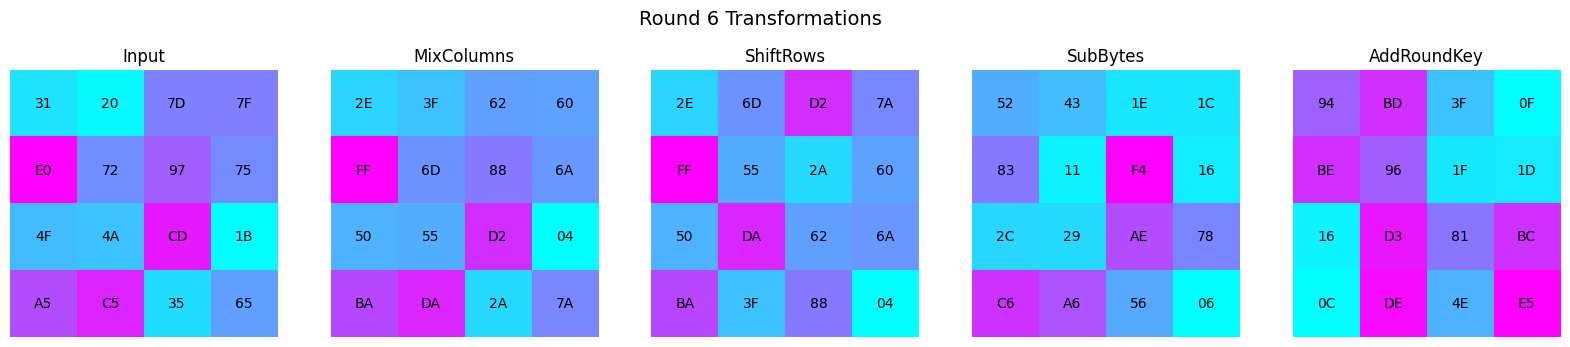

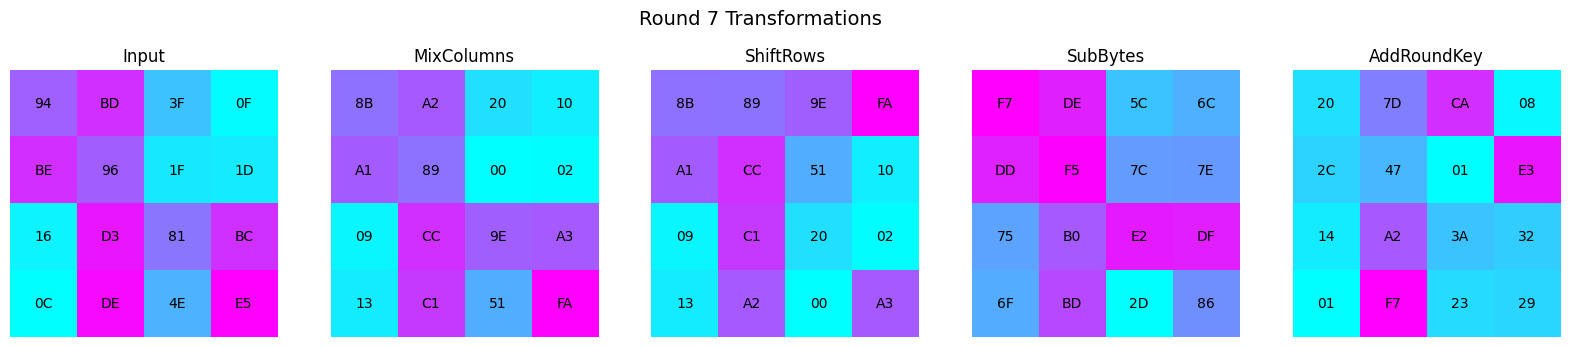

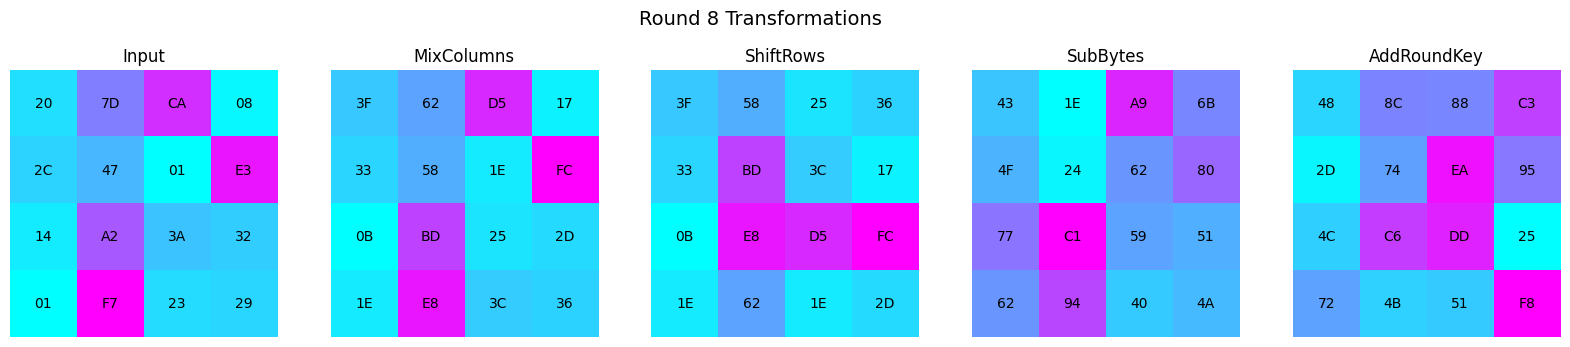

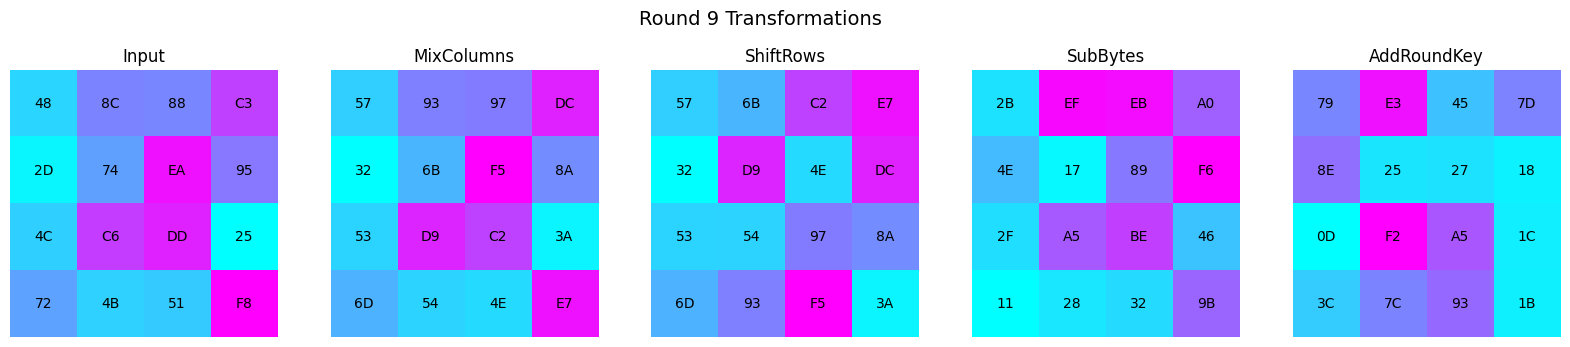

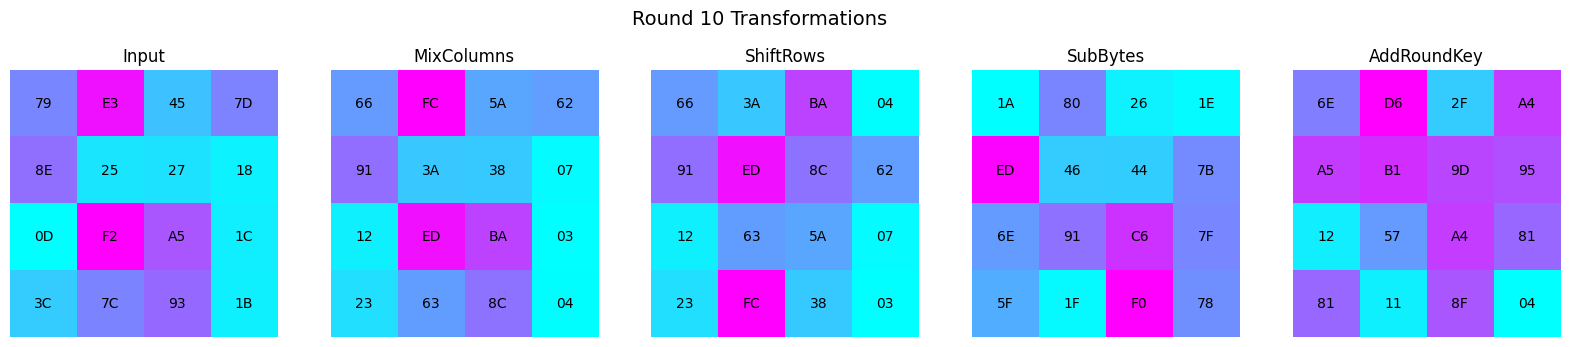

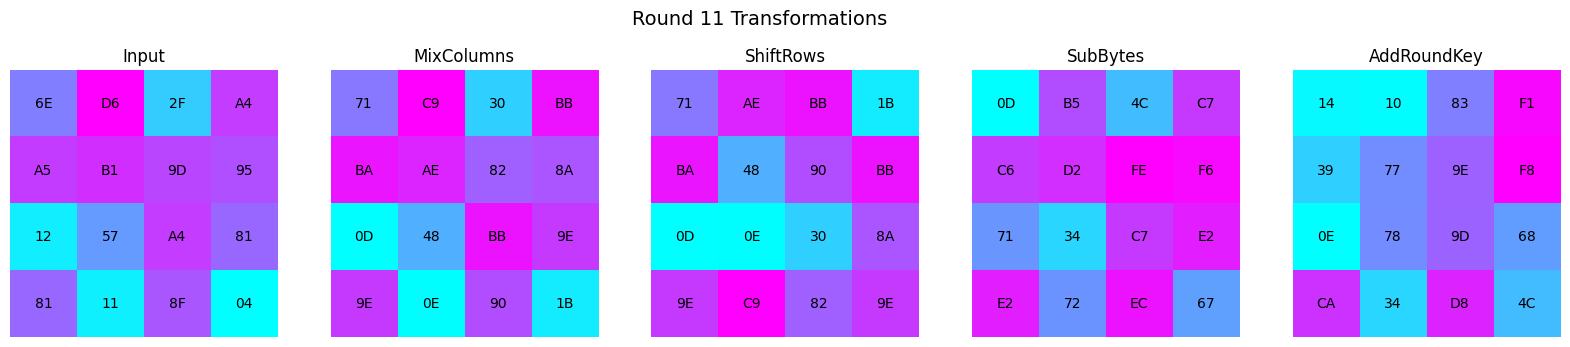

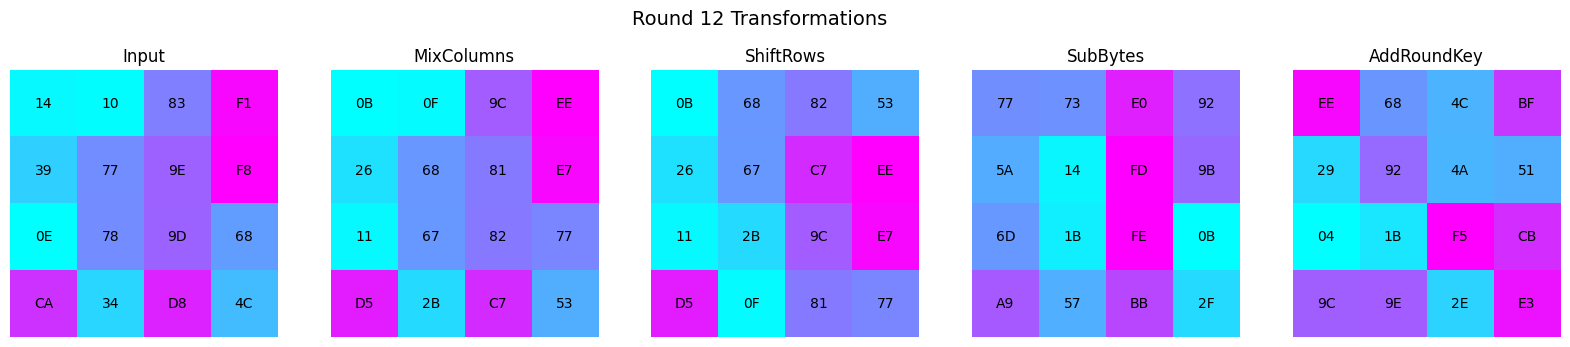

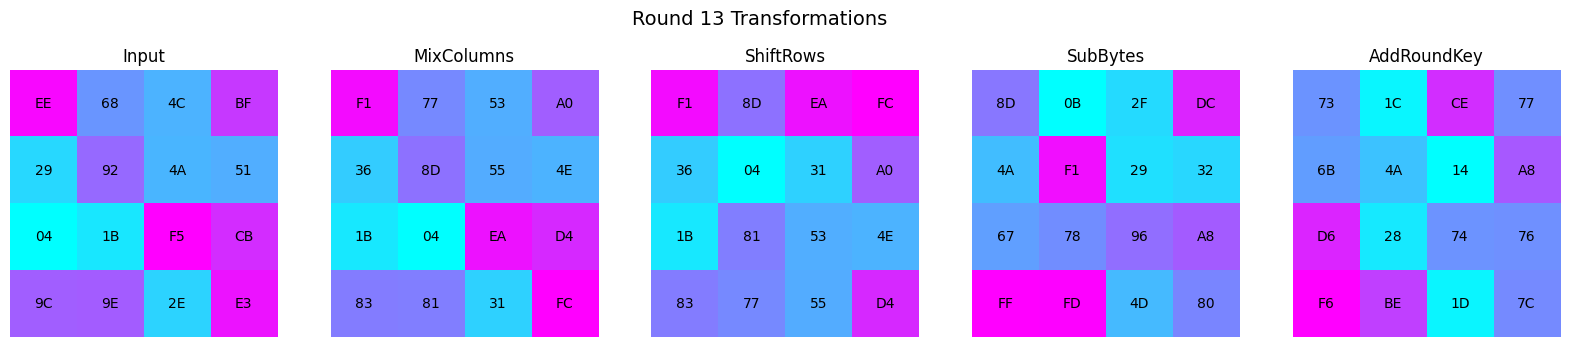

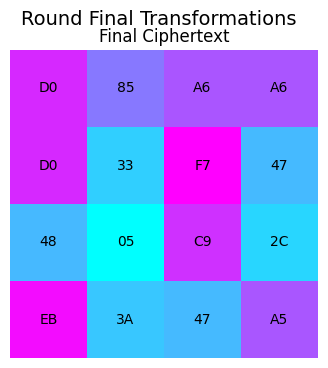

Ciphertext (hex): d085a6a6d033f7474805c92ceb3a47a5


In [ ]:
from Crypto.Random import get_random_bytes
from Crypto.Cipher import AES
from threading import Thread
import matplotlib.pyplot as plt
import numpy as np

# Constants
BLOCK_SIZE = 16
KEY_SIZE = 16
NUM_ROUNDS = 14

# Lightweight SubBytes using a simple XOR operation
def lightweight_substitute(byte):
    return byte ^ 0x5A

def lightweight_subbytes(state):
    return bytes(lightweight_substitute(b) for b in state)

# AES-style ShiftRows
def shift_rows(state):
    matrix = [list(state[i::4]) for i in range(4)]
    for i in range(1, 4):
        matrix[i] = matrix[i][i:] + matrix[i][:i]
    return bytes(sum(zip(*matrix), ()))

# Lightweight MixColumns using XOR
def mix_columns(state):
    return bytes((b ^ 0x1F) for b in state)

# XOR AddRoundKey
def add_round_key(state, round_key):
    return bytes(a ^ b for a, b in zip(state, round_key))

# Simulated Key Expansion
def key_expansion(key, rounds):
    cipher = AES.new(key, AES.MODE_ECB)
    expanded_keys = [key]
    temp = key
    for _ in range(rounds):
        temp = cipher.encrypt(temp)
        expanded_keys.append(temp)
    return expanded_keys

# Padding
def pad(data):
    pad_len = BLOCK_SIZE - (len(data) % BLOCK_SIZE)
    return data + bytes([pad_len] * pad_len)

# Simple AES S-Box (placeholder)
AES_SBOX = [int('0x' + format(i ^ 0x63, '02x'), 16) for i in range(256)]

# Visualization: One graph with subplots
def plot_all_states(states, titles, round_num):
    fig, axs = plt.subplots(1, len(states), figsize=(4 * len(states), 4))
    if len(states) == 1:
        axs = [axs]
    for i, (state, title) in enumerate(zip(states, titles)):
        array = np.array([b for b in state]).reshape(4, 4)
        axs[i].imshow(array, cmap="cool", interpolation='nearest')
        for (x, y), val in np.ndenumerate(array):
            axs[i].text(y, x, f'{val:02X}', ha='center', va='center', color='black')
        axs[i].set_title(f"{title}", fontsize=12)
        axs[i].axis('off')
    fig.suptitle(f'Round {round_num} Transformations', fontsize=14)
    plt.show()

# Parallel Round
def parallel_round(state, round_key, use_lightweight=False, r=0):
    result = {}

    def subbytes():
        result['sub'] = lightweight_subbytes(state) if use_lightweight else bytes([AES_SBOX[b] for b in state])

    def shiftrows():
        result['shift'] = shift_rows(state)

    def mixcolumns():
        result['mix'] = mix_columns(state)

    t1 = Thread(target=subbytes)
    t2 = Thread(target=shiftrows)
    t3 = Thread(target=mixcolumns)
    t1.start(), t2.start(), t3.start()
    t1.join(), t2.join(), t3.join()

    mixed = result['mix']
    shifted = shift_rows(mixed)
    subbed = lightweight_subbytes(shifted) if use_lightweight else result['sub']
    final = add_round_key(subbed, round_key)

    # Plot all steps
    plot_all_states(
        [state, mixed, shifted, subbed, final],
        ["Input", "MixColumns", "ShiftRows", "SubBytes", "AddRoundKey"],
        r
    )

    return final

# Enhanced AES Encrypt
def enhanced_aes_encrypt(data, key, rounds=NUM_ROUNDS, light_rounds=[2, 3, 4]):
    data = pad(data)
    state = data[:BLOCK_SIZE]
    round_keys = key_expansion(key, rounds)

    # Initial Round
    state = add_round_key(state, round_keys[0])
    plot_all_states([data[:BLOCK_SIZE], state], ["Original", "After Initial AddRoundKey"], "Initial")

    # Main Rounds
    for r in range(1, rounds):
        use_lightweight = r in light_rounds
        state = parallel_round(state, round_keys[r], use_lightweight=use_lightweight, r=r)

    # Final Round
    state = lightweight_subbytes(state)
    state = shift_rows(state)
    state = add_round_key(state, round_keys[-1])
    plot_all_states([state], ["Final Ciphertext"], "Final")

    return state

# Test
key = get_random_bytes(KEY_SIZE)
data = get_random_bytes(16)
ciphertext = enhanced_aes_encrypt(data, key)
print("Ciphertext (hex):", ciphertext.hex())
